## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [207]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.1
Usando seaborn 0.10.0
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [208]:
# solução
filmes = pd.read_csv('movies.csv', index_col=0)
filmes = filmes.rename(columns = {'movieId':'filmeId','title':'titulo','genres':'generos'})

In [209]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   titulo   9742 non-null   object
 1   generos  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB


In [210]:
filmes.head()

,titulo,generos
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [211]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [212]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [213]:
# solução
notas = pd.read_csv('ratings.csv').rename(columns = {'userId':'usuarioId',
                                                     'movieId':'filmeId',
                                                     'rating':'nota',
                                                     'timestamp':'momento'})

In [214]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmeId    100836 non-null  int64  
 2   nota       100836 non-null  float64
 3   momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [215]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [216]:
# solução
filmes['nota_media'] = notas.nota.groupby(notas.filmeId).mean()

In [217]:
notas.query('filmeId == 5').nota.mean()

3.0714285714285716

In [218]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [219]:
# solução para calcular o total de votos por filme
notas.nota.groupby(notas.filmeId).count()

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [220]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = notas.nota.groupby(notas.filmeId).count()
filmes = filmes.query('total_de_votos>49')
filmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 1 to 122904
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titulo             450 non-null    object 
 1   generos            450 non-null    object 
 2   ano_de_lancamento  450 non-null    float64
 3   nota_media         450 non-null    float64
 4   total_de_votos     450 non-null    float64
dtypes: float64(3), object(2)
memory usage: 21.1+ KB


In [221]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

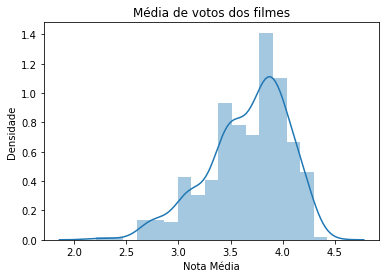

In [222]:
# solução histograma
ax = sns.distplot(filmes.nota_media)
ax.set(ylabel='Densidade',xlabel='Nota Média')
ax.set_title('Média de votos dos filmes')
ax=ax

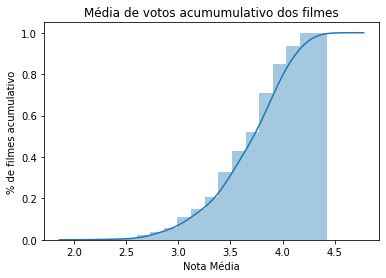

In [223]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.set(ylabel='% de filmes acumulativo',xlabel='Nota Média')
ax.set_title('Média de votos acumumulativo dos filmes')
ax=ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

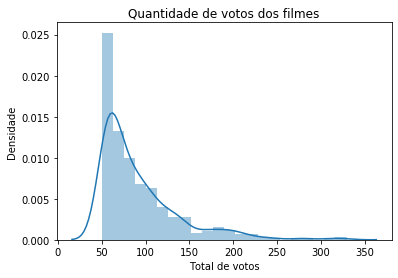

In [224]:
# solução histograma
ax = sns.distplot(filmes.total_de_votos)
ax.set(xlabel='Total de votos',ylabel='Densidade')
ax.set_title('Quantidade de votos dos filmes')
ax=ax

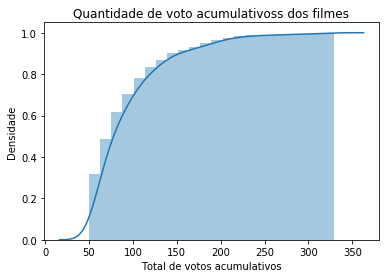

In [225]:
# solução cumulativa
ax = sns.distplot(filmes.total_de_votos,  hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.set(xlabel='Total de votos acumulativos',ylabel='Densidade')
ax.set_title('Quantidade de voto acumulativoss dos filmes')
ax=ax

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [226]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(q=0.8)
nota_limite_dos_20_porcento

3.992833035537026

In [227]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [228]:
filmes.generos.str


In [229]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes.generos.str.get_dummies(sep='|')
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [230]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

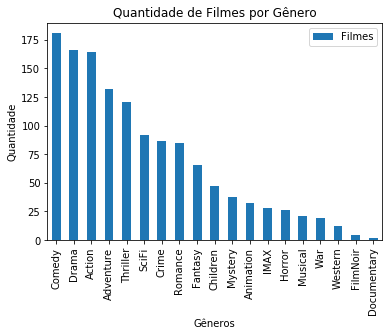

In [231]:
# solução

ax = pd.DataFrame(generos.sum().sort_values(ascending=False),columns=['Filmes']).plot(kind='bar')
ax.set(xlabel='Gêneros',ylabel='Quantidade')
ax.set_title('Quantidade de Filmes por Gênero')
ax=ax

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [232]:
# solução
top5_generos_em_quantidade_de_filmes = pd.DataFrame(generos.sum().sort_values(ascending=False)[:5],columns=['Filmes'])

In [233]:
print(top5_generos_em_quantidade_de_filmes)

           Filmes
Comedy        181
Drama         166
Action        164
Adventure     132
Thriller      121


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [234]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [235]:
# solucão
votos_por_genero = pd.DataFrame(votos_por_genero_por_filme.sum().sort_values(ascending=False),columns=['Votos'])


In [236]:
# solução

votos_por_genero

,Votos
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0
SciFi,8989.0
Crime,8649.0
Romance,7444.0
Fantasy,5993.0
Children,4331.0


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [237]:
# solucao código
votos_por_filme_por_genero = votos_por_genero.copy()
votos_por_filme_por_genero['Filmes'] = generos.sum()
votos_por_filme_por_genero['Popularidade'] = (votos_por_filme_por_genero.Votos / votos_por_filme_por_genero.Filmes).round()
votos_por_filme_por_genero.Popularidade.sort_values(ascending=False)

War            111.0
Crime           99.0
Adventure       99.0
Thriller        98.0
SciFi           98.0
Action          96.0
Animation       96.0
Drama           93.0
Children        92.0
Fantasy         91.0
Mystery         91.0
IMAX            89.0
Romance         88.0
Musical         87.0
Horror          85.0
Comedy          85.0
Western         75.0
FilmNoir        73.0
Documentary     54.0
Name: Popularidade, dtype: float64

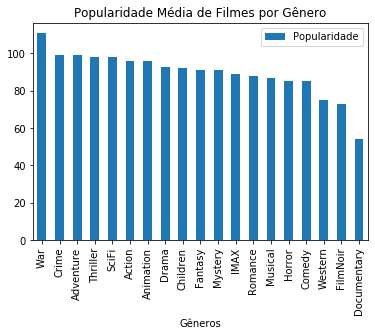

In [238]:
# solução com visualização 
ax = pd.DataFrame(votos_por_filme_por_genero.Popularidade.sort_values(ascending=False),columns=['Popularidade']).plot(kind='bar')
ax.set(xlabel='Gêneros',ylabel='')
ax.set_title('Popularidade Média de Filmes por Gênero')
ax=ax

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    O gênero Action é o terceiro gênero com mais filmes e o gênero com mais votos. Porém é o sétimo gênero em popularidade média. 
    Já o gênero War tem poucos filmes e poucos votos em proporção à todos os gêneros. Mas é o primeiro na popularidade média, isso mostra que o público do gênero war, mesmo entre os menores, é mais ativo ou acessível em avaliar os filmes em proporção ao gênero Action.  
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [239]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Text(0.5, 1.0, 'Comparando Total de Votos por filme dos generos Horror e Adventure')

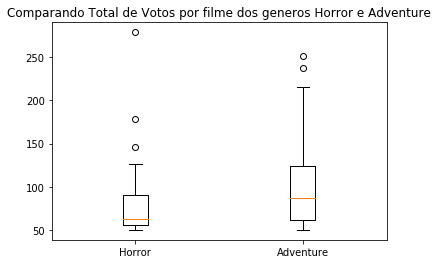

In [240]:
# solução:
import matplotlib.pyplot as plt

plt.boxplot(x = [filmes.query('Horror>=1').total_de_votos,filmes.query('Adventure>=1').total_de_votos],
            labels=["Horror","Adventure"])
plt.title('Comparando Total de Votos por filme dos generos Horror e Adventure')



## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [241]:
generos.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [242]:
Action = filmes.query('Action>=1').total_de_votos,
Adventure = filmes.query('Adventure>=1').total_de_votos
Animation = filmes.query('Animation>=1').total_de_votos
Children = filmes.query('Children>=1').total_de_votos
Comedy = filmes.query('Comedy>=1').total_de_votos
Crime = filmes.query('Crime>=1').total_de_votos
Documentary = filmes.query('Documentary>=1').total_de_votos
Drama = filmes.query('Drama>=1').total_de_votos
Fantasy = filmes.query('Fantasy>=1').total_de_votos
FilmNoir = filmes.query('FilmNoir>=1').total_de_votos
Horror = filmes.query('Horror>=1').total_de_votos
IMAX = filmes.query('IMAX>=1').total_de_votos
Musical = filmes.query('Musical>=1').total_de_votos
Mystery = filmes.query('Mystery>=1').total_de_votos
Romance = filmes.query('Romance>=1').total_de_votos
SciFi = filmes.query('SciFi>=1').total_de_votos
Thriller = filmes.query('Thriller>=1').total_de_votos
War = filmes.query('War>=1').total_de_votos
Western = filmes.query('Western>=1').total_de_votos


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 <a list of 19 Text xticklabel objects>)

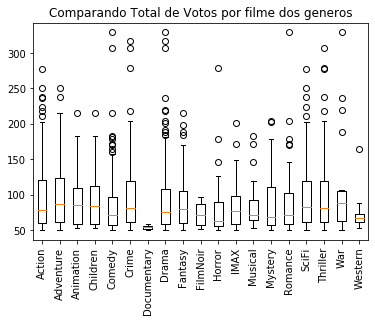

In [243]:
plt.boxplot(x = [Action, Adventure, Animation, Children, Comedy, Crime, Documentary, Drama, 
                 Fantasy, FilmNoir, Horror, IMAX,Musical, Mystery, Romance, SciFi, Thriller, War, Western],
            labels=['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'])
plt.title('Comparando Total de Votos por filme dos generos')
plt.xticks(rotation=90)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    Não há dados sobre faturamento das vendas de filmes por genêro, porém a chance de ter mais votos os filmes do genero Adventure é maior que Horror.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Quantidade de votos por filme Adventure')

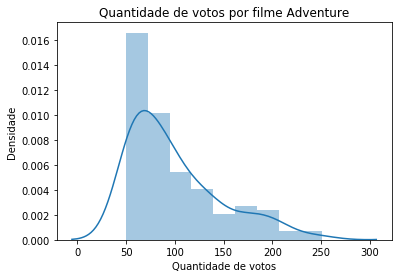

In [244]:
# solucao histograma de aventura
ax = sns.distplot(Adventure)
ax.set(xlabel='Quantidade de votos', ylabel='Densidade')
ax.set_title('Quantidade de votos por filme Adventure')

Text(0.5, 1.0, 'Quantidade de votos por filme horror')

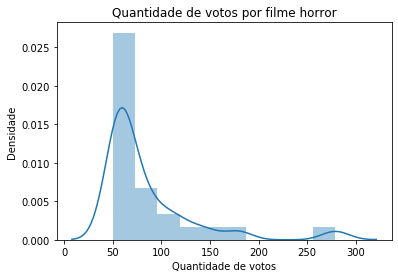

In [245]:
# solucao histograma de horror
ax = sns.distplot(Horror)
ax.set(xlabel='Quantidade de votos', ylabel='Densidade')
ax.set_title('Quantidade de votos por filme horror')

In [246]:
print("Quantidade de dados e média de Adventure:",len(Adventure)," e ",Adventure.mean())
print("Quantidade de dados e médi de Horror", Horror.count()," e ", Horror.mean())

Quantidade de dados e média de Adventure: 132  e  99.37121212121212
Quantidade de dados e médi de Horror 26  e  85.1923076923077


In [247]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_, p_valor_Adventure = normaltest(Adventure)

p = 0.05

if p_valor_Adventure < p:  
    # A função normaltest testa a hipótese nula  H0  de que a amostra é proveniente de uma distribuição normal.
    print("Podemos rejeitar a hipótese nula H0, pvalor:",p_valor_Adventure)
else:
    print("Não Podemos rejeitar a hipótese nula H0, pvalor",p_valor_Adventure)

Podemos rejeitar a hipótese nula H0, pvalor: 5.987863006199139e-06


In [248]:
_, p_valor_Horror = normaltest(Horror)
if p_valor_Horror < p:  
    # A função normaltest testa a hipótese nula  H0  de que a amostra é proveniente de uma distribuição normal.
    print("Podemos rejeitar a hipótese nula H0, pvalor:",p_valor_Horror)
else:
    print("Não Podemos rejeitar a hipótese nula H0, pvalor",p_valor_Horror)

Podemos rejeitar a hipótese nula H0, pvalor: 1.2786148884334685e-07


# Solução com o teste desejado

### $\mu_1 \Rightarrow$ Média de votos Adventure
### $\mu_2 \Rightarrow$ Média de votos Horror

### $
\begin{cases}
H_0: \mu_1  = \mu_2\\
H_1: \mu_1 ≠ \mu_2
\end{cases}
$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

In [249]:
# solução com o teste desejado
from statsmodels.stats.weightstats import CompareMeans
test = CompareMeans.from_data(Adventure,Horror)

In [250]:
Z , p_valor = test.ztest_ind(alternative='two-sided', value=0)
p = 0.05/2
if p_valor < p:  
    print("Podemos rejeitar a hipótese nula H0, p_valor:",p_valor)
else:
    print("Não Podemos rejeitar a hipótese nula H0, p_valor",p_valor)

Não Podemos rejeitar a hipótese nula H0, p_valor 0.1657470896754617


### Solução (explique sua conclusão):
Com o nível de confiança de 95% não podemos rejeitar a hipótese nula de H0, portanto a média de votos do genero Adventure não tem diferença significativa a média Horror. 
Logo a recomendação citada anteriomente é descartada e não podemos afirmar que a média de votos de filmes do genero Adventure é maior que Horror e sim que elas são iguais.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Nota Média dos Votos por filme do genero Horror')

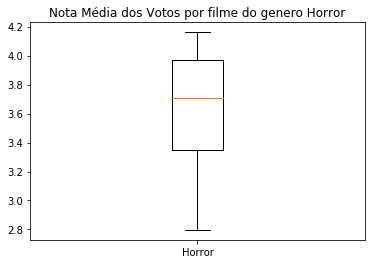

In [251]:
# solução:
plt.boxplot(x = [filmes.query('Horror>=1').nota_media], labels=["Horror"])
plt.title('Nota Média dos Votos por filme do genero Horror')

Text(0.5, 1.0, 'Nota Média dos Votos por filme do genero Adventure')

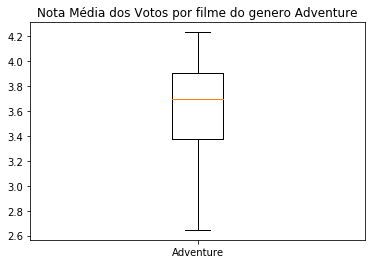

In [252]:
plt.boxplot(x = [filmes.query('Adventure>=1').nota_media], labels=["Adventure"])
plt.title('Nota Média dos Votos por filme do genero Adventure')

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Os boxplot dos votos dos generos Adventure e Horror são muitos semelhantes para analisar a diferença olhando no gráfico, mas recomendaria o genero Horror, pois o valor mínimo do boxplot é maior que o Adventure.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

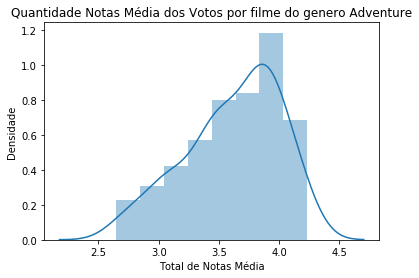

In [253]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query('Adventure>=1').nota_media)
ax.set(xlabel='Total de Notas Média',ylabel='Densidade')
ax.set_title('Quantidade Notas Média dos Votos por filme do genero Adventure')
ax=ax

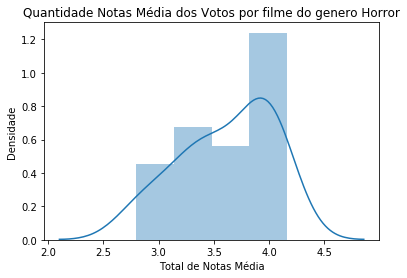

In [254]:
# solucao histograma de horror
ax = sns.distplot(filmes.query('Horror>=1').nota_media)
ax.set(xlabel='Total de Notas Média',ylabel='Densidade')
ax.set_title('Quantidade Notas Média dos Votos por filme do genero Horror')
ax=ax

In [255]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

from scipy.stats import normaltest

Adventure_notas_media = filmes.query('Adventure>=1').nota_media
_, p_valor_Adventure = normaltest(Adventure_notas_media)

p = 0.05

if p_valor_Adventure < p:  
    # A função normaltest testa a hipótese nula  H0  de que a amostra é proveniente de uma distribuição normal.
    print("Podemos rejeitar a hipótese nula H0, pvalor:",p_valor_Adventure)
else:
    print("Não Podemos rejeitar a hipótese nula H0, pvalor",p_valor_Adventure)

Podemos rejeitar a hipótese nula H0, pvalor: 0.012835697582553224


In [256]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

from scipy.stats import normaltest

Horror_notas_media = filmes.query('Horror>=1').nota_media
_, p_valor_Horror = normaltest(Horror_notas_media)

p = 0.05

if p_valor_Horror < p:  
    # A função normaltest testa a hipótese nula  H0  de que a amostra é proveniente de uma distribuição normal.
    print("Podemos rejeitar a hipótese nula H0, pvalor:",p_valor_Horror)
else:
    print("Não Podemos rejeitar a hipótese nula H0, pvalor",p_valor_Horror)

Não Podemos rejeitar a hipótese nula H0, pvalor 0.21186284682483916


In [257]:
print("Horror: ",Horror_notas_media.describe())
print("Adventure: ",Adventure_notas_media.describe())

Horror:  count    26.000000
mean      3.610527
std       0.419267
min       2.796875
25%       3.346470
50%       3.707704
75%       3.972898
max       4.161290
Name: nota_media, dtype: float64
Adventure:  count    132.000000
mean       3.615373
std        0.392217
min        2.645455
25%        3.373580
50%        3.693742
75%        3.904919
max        4.232394
Name: nota_media, dtype: float64


# Solução com o teste desejado

### $\mu_1 \Rightarrow$ Média de notas Adventure
### $\mu_2 \Rightarrow$ Média de notas Horror

### $
\begin{cases}
H_0: \mu_1  = \mu_2\\
H_1: \mu_1 ≠ \mu_2
\end{cases}
$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

In [258]:
# solução com o teste desejado
from statsmodels.stats.weightstats import CompareMeans

test = CompareMeans.from_data(Adventure_notas_media,Horror_notas_media)

In [259]:
Z , p_valor = test.ztest_ind(alternative='two-sided', value=0)
p = 0.05/2
if p_valor < p:  
    print("Podemos rejeitar a hipótese nula H0, pvalor:",p_valor)
else:
    print("Não Podemos rejeitar a hipótese nula H0, pvalor",p_valor)

Não Podemos rejeitar a hipótese nula H0, pvalor 0.9545895892323073


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Com o nível de confiança de 95% não podemos rejeitar a hipótese nula de H0, portanto as médias de notas do genero Horro é igual a Adventure

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

A análise de dados mostra que não há diferença, com o nível de confiança de 95%, na média de quantidade de votos e nas médias de notas dos dois generos. Estatisticamente não há primeiro ou segundo lugar nas notas e popularidade.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [260]:
votos_por_genero

,Votos
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0
SciFi,8989.0
Crime,8649.0
Romance,7444.0
Fantasy,5993.0
Children,4331.0


In [261]:
# solução: calculando os 2 generos mais votados
top_2_votatos = votos_por_genero.nlargest(2,['Votos'])
top_2_votatos


,Votos
Action,15734.0
Drama,15445.0


In [262]:
# solução: encontrando os top 5 filmes desses generos
print( "Top 5 filmes do genero Action:",filmes.query('Action>=1').nlargest(5,['nota_media']).titulo.values)

print( "Top 5 filmes do genero Drama:",filmes.query('Drama>=1').nlargest(5,['nota_media']).titulo.values)

Top 5 filmes do genero Action: ['Fight Club (1999)' 'Dark Knight, The (2008)'
 'Princess Bride, The (1987)' 'Star Wars: Episode IV - A New Hope (1977)'
 'Apocalypse Now (1979)']
Top 5 filmes do genero Drama: ['Shawshank Redemption, The (1994)' 'Godfather, The (1972)'
 'Fight Club (1999)' 'Cool Hand Luke (1967)'
 'Godfather: Part II, The (1974)']


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [263]:
filtro = generos.columns
filtro


Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [264]:
# solucao maior correlação
filmes.corr().round(3).loc[filtro].nlargest(2,['nota_media'])

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
Drama,0.028,0.278,0.019,-0.254,-0.290,-0.122,-0.126,-0.289,0.092,0.018,...,-0.023,-0.110,-0.083,-0.082,0.016,0.066,-0.159,-0.038,0.206,-0.012
Crime,0.061,0.190,0.080,0.062,-0.241,-0.092,-0.130,-0.126,1.000,-0.033,...,0.193,-0.049,-0.033,-0.108,0.114,-0.207,-0.178,0.249,-0.075,-0.081


In [265]:
# solucao menor correlação
filmes.corr().round(3).loc[filtro].nsmallest(2,['nota_media'])

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
Comedy,0.019,-0.256,-0.129,-0.292,-0.091,0.126,0.120,1.000,-0.126,0.013,...,-0.078,-0.028,-0.155,0.055,-0.200,0.229,-0.214,-0.365,-0.082,0.005
Action,0.140,-0.154,0.066,1.000,0.334,-0.174,-0.213,-0.292,0.062,-0.051,...,-0.023,-0.009,0.130,-0.146,-0.064,-0.200,0.326,0.311,0.071,0.047


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [266]:
# solucao maior correlação
filmes.corr().round(3).loc[filtro].nlargest(2,['total_de_votos'])

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
Adventure,0.114,-0.080,0.104,0.334,1.000,0.164,0.179,-0.091,-0.241,-0.043,...,-0.061,-0.097,0.218,-0.050,-0.090,-0.174,0.279,-0.005,-0.087,0.045
War,0.026,0.126,0.088,0.071,-0.087,-0.058,-0.072,-0.082,-0.075,-0.014,...,-0.020,-0.052,-0.008,-0.046,-0.064,-0.017,-0.106,-0.053,1.000,0.034


In [267]:
# solucao menor correlação
filmes.corr().round(3).loc[filtro].nsmallest(2,['total_de_votos'])

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
Comedy,0.019,-0.256,-0.129,-0.292,-0.091,0.126,0.120,1.000,-0.126,0.013,...,-0.078,-0.028,-0.155,0.055,-0.20,0.229,-0.214,-0.365,-0.082,0.005
Western,-0.063,-0.060,-0.061,0.047,0.045,-0.046,-0.057,0.005,-0.081,-0.011,...,-0.016,-0.041,-0.043,-0.037,-0.05,-0.009,-0.016,-0.100,0.034,1.000


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

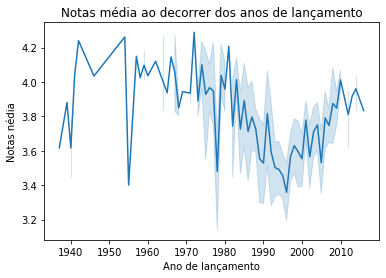

In [268]:
# solucao
import seaborn as sns
ax = sns.lineplot(x=filmes.ano_de_lancamento, y = filmes.nota_media)
ax.set(xlabel='Ano de lançamento',ylabel='Notas nédia')
ax.set_title('Notas média ao decorrer dos anos de lançamento')
ax=ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [269]:
# solução (código)
filmes[['ano_de_lancamento','nota_media']].corr()


,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000


### Solução (explicação)



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

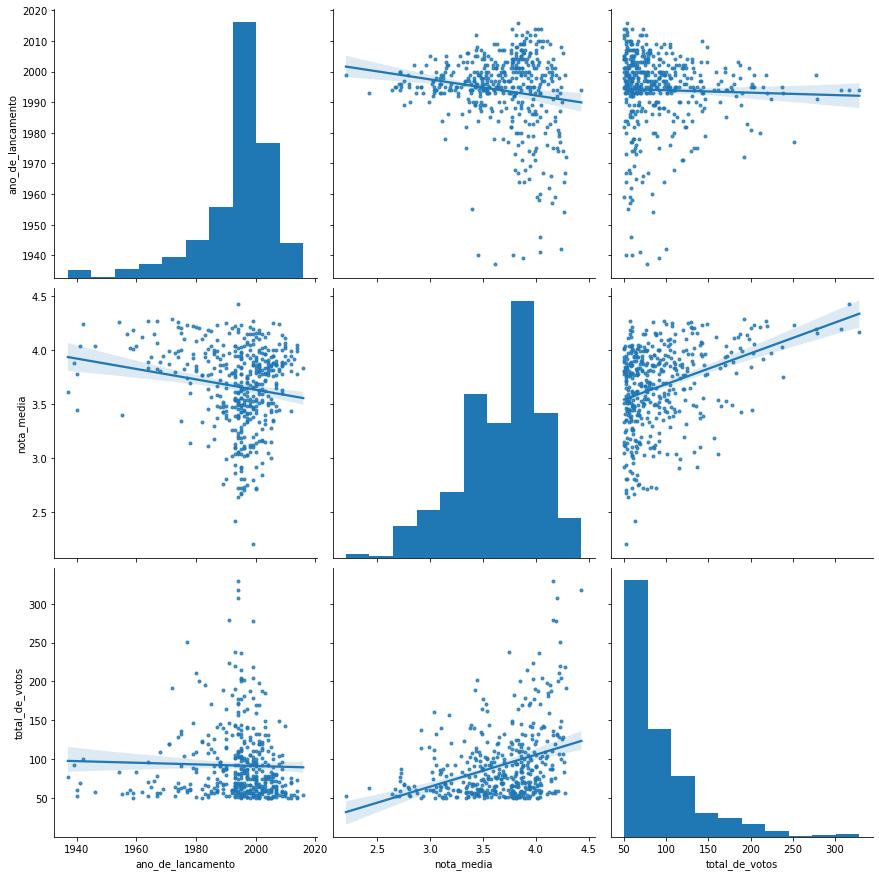

In [270]:
# solução
import seaborn as sns
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]
ax = sns.pairplot(infos, markers=".",kind="reg",height=4)
ax=ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

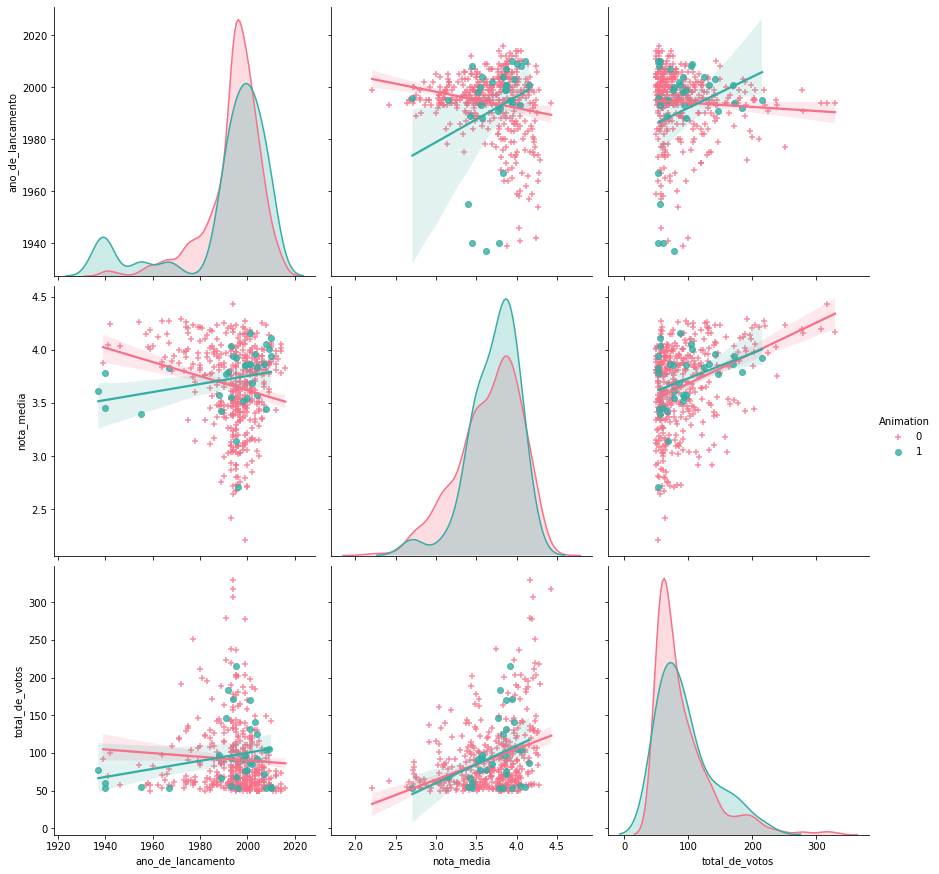

In [271]:
import seaborn as sns
filmes
ax = sns.pairplot(filmes[['ano_de_lancamento','nota_media','total_de_votos','Animation']],kind="reg",height=4,
                  palette="husl",hue='Animation',markers=["+","o"])
ax=ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
####    Sim, a correlação linear de 0,26 mostra uma tendencia de aumento de nota média ao longo dos anos.


In [272]:
filmes_animation = filmes.query('Animation>=1')
filmes_animation[['ano_de_lancamento','nota_media']].corr().round(2)

,ano_de_lancamento,nota_media
ano_de_lancamento,1.00,0.26
nota_media,0.26,1.00


- E o `ano_de_lancamento` x `total_de_votos`?
####    Sim, a correlação linear de 0,25 mostra uma tendencia de aumento de total_de_votos ao longo dos anos.


In [273]:
filmes_animation = filmes.query('Animation>=1')
filmes_animation[['ano_de_lancamento','total_de_votos']].corr().round(2)

,ano_de_lancamento,total_de_votos
ano_de_lancamento,1.00,0.25
total_de_votos,0.25,1.00


- E das outras categorias? Compare isso com os outros filmes.
####   As outras categorias tem um correlação linear negativa, o que mostra uma tendencia de redução de total de votos e nota média por filme ao longo dos anos.

In [274]:
filmes_animation = filmes.query('Animation<1')
filmes_animation[['ano_de_lancamento','total_de_votos','nota_media']].corr().round(2)

,ano_de_lancamento,total_de_votos,nota_media
ano_de_lancamento,1.00,-0.06,-0.20
total_de_votos,-0.06,1.00,0.34
nota_media,-0.20,0.34,1.00


- O que leva você levantar como hipótese para esse resultado?
#### Os filmes do genero Animation tem uma correlação diferente na amostragem de todos os generos de filmes, enquanto todo os generos mostram uma redução de média de votos e total de votos por filme ao longo dos anos, os filmes do genero Animation motram um aumento. Isso mostra que ao longo dos anos o genero Animation está se tornando mais popular e com boa nota da crítica.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

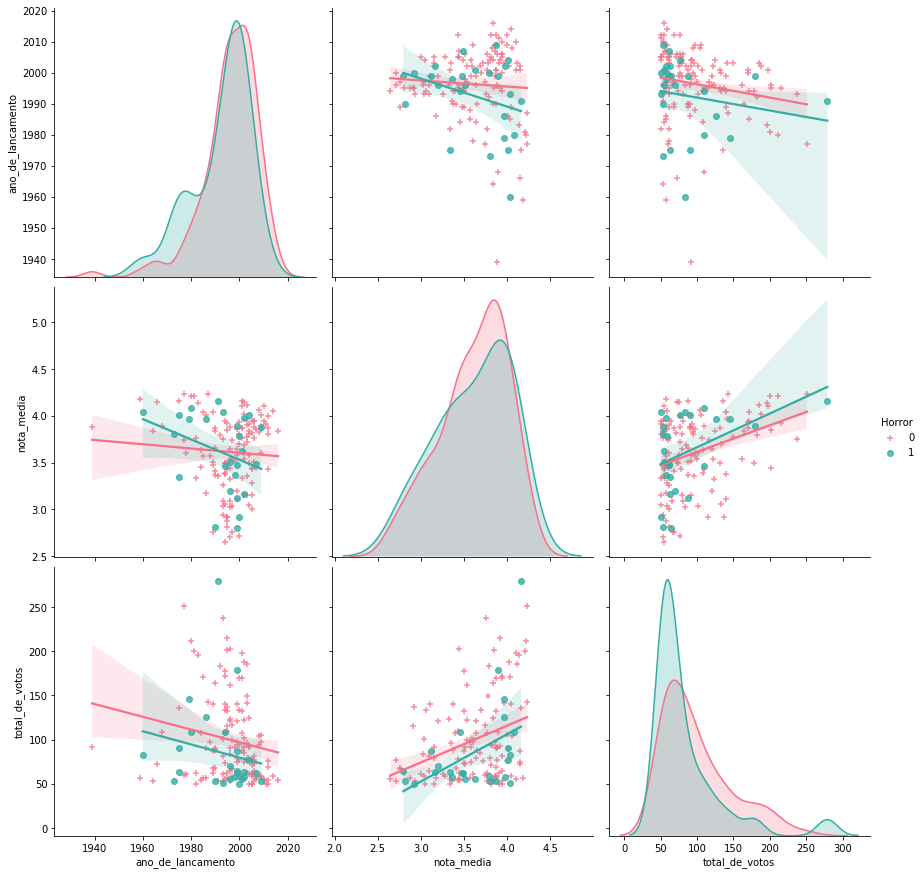

In [275]:
## Analisando genero Horror e Adventure e verificamos que seguem a correlação de todos os generos com o ano de lançamento, redução.
import seaborn as sns
filmes_Horror_Adventure = filmes.query('Horror>0 or Adventure>0')
ax = sns.pairplot(filmes_Horror_Adventure[['ano_de_lancamento','nota_media','total_de_votos','Horror']],kind="reg",height=4,
                  palette="husl",hue='Horror',markers=["+","o"])
ax=ax

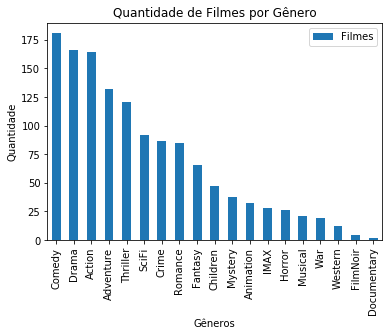

In [276]:
## O genero Animation não tem muitos filmes

ax = pd.DataFrame(generos.sum().sort_values(ascending=False),columns=['Filmes']).plot(kind='bar')
ax.set(xlabel='Gêneros',ylabel='Quantidade')
ax.set_title('Quantidade de Filmes por Gênero')
ax=ax

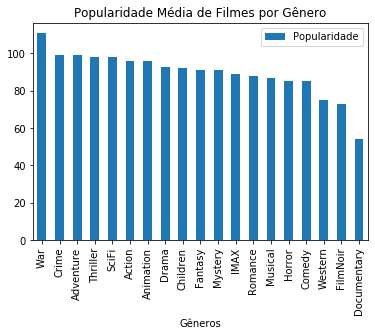

In [277]:
## O genero Animation é o sétimo genero com maior popularidade

ax = pd.DataFrame(votos_por_filme_por_genero.Popularidade.sort_values(ascending=False),columns=['Popularidade']).plot(kind='bar')
ax.set(xlabel='Gêneros',ylabel='')
ax.set_title('Popularidade Média de Filmes por Gênero')
ax=ax

In [278]:
Animation_notas_media = filmes.query('Animation>=1 and ano_de_lancamento>=2000').nota_media
Adventure_notas_media = filmes.query('Adventure>=1 and ano_de_lancamento>=2000').nota_media

In [279]:
Animation_notas_media.describe()

count    14.000000
mean      3.852434
std       0.215637
min       3.444444
25%       3.725176
50%       3.869634
75%       3.993820
max       4.155172
Name: nota_media, dtype: float64

In [280]:
Adventure_notas_media.describe()

count    58.000000
mean      3.718579
std       0.320917
min       2.714286
25%       3.515454
50%       3.820685
75%       3.939559
max       4.155172
Name: nota_media, dtype: float64

# Solução com o teste desejado

### $\mu_1 \Rightarrow$ Média de notas Animation
### $\mu_2 \Rightarrow$ Média de notas Horror

### $
\begin{cases}
H_0: \mu_1  = \mu_2\\
H_1: \mu_1 ≠ \mu_2
\end{cases}
$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

In [281]:
# solução com o teste desejado
from statsmodels.stats.weightstats import CompareMeans

test = CompareMeans.from_data(Animation_notas_media,Adventure_notas_media)

In [282]:
Z , p_valor = test.ztest_ind(alternative='two-sided', value=0)
p = 0.05/2
if p_valor < p:  
    print("Podemos rejeitar a hipótese nula H0, p_valor:",p_valor)
else:
    print("Não Podemos rejeitar a hipótese nula H0, p_valor",p_valor)

Não Podemos rejeitar a hipótese nula H0, p_valor 0.1394008013521119


### <font color='green'>Conclusão: Com um nível de confiança de 95% não rejeitamos $H_0$, isto é, concluímos que a média dos votos do Animation é igual a média de votos de Adventure </font>

In [283]:
Animation_total_de_votos = filmes.query('Animation>=1 and ano_de_lancamento>=2000').total_de_votos
Adventure_total_de_votos = filmes.query('Adventure>=1 and ano_de_lancamento>=2000').total_de_votos

In [284]:
Animation_total_de_votos.describe()

count     14.000000
mean      96.642857
std       35.289151
min       53.000000
25%       73.500000
50%       89.500000
75%      120.000000
max      170.000000
Name: total_de_votos, dtype: float64

In [285]:
Adventure_total_de_votos.describe()

count     58.000000
mean      88.017241
std       38.412120
min       50.000000
25%       59.000000
50%       77.000000
75%      100.750000
max      198.000000
Name: total_de_votos, dtype: float64

# Solução com o teste desejado

### $\mu_1 \Rightarrow$ Total de votos Animation
### $\mu_2 \Rightarrow$ Total de votos Horror

### $
\begin{cases}
H_0: \mu_1  = \mu_2\\
H_1: \mu_1 ≠ \mu_2
\end{cases}
$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

In [286]:
# solução com o teste desejado
from statsmodels.stats.weightstats import CompareMeans

test = CompareMeans.from_data(Animation_total_de_votos,Adventure_total_de_votos)

In [287]:
Z , p_valor = test.ztest_ind(alternative='two-sided', value=0)
p = 0.05/2
if p_valor < p:  
    print("Podemos rejeitar a hipótese nula H0, p_valor:",p_valor)
else:
    print("Não Podemos rejeitar a hipótese nula H0, p_valor",p_valor)

Não Podemos rejeitar a hipótese nula H0, p_valor 0.4441080216236639


### <font color='green'>Conclusão: Com um nível de confiança de 95% não rejeitamos $H_0$, isto é, concluímos que a quantidade dos votos do Animation é igual a média de votos de Adventure </font>

# Conclusão:
## Os generos Adventure e Horror analisados anteriomente, para axuliar a tomada de decisão de qual genero tem maior probabilidade de trazer retorno de invetimentos, seguem a tendencia de redução da média de notas e quantidade de votos ao longo dos anos. 
## Um genero sugerido para investir seria o Animation, pois a correlação de quantidade de votos e média de votos é positiva ao longo dos anos, porém comparando a média de notas e quantidade de votos por filme dos generos Adventure e Animation são iguais nos dados analisados.
## Se a tendencias continuar ao longo dos anos há chance de mudar essa igualdade e o genero Animation seja uma boa opção para investir.